In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
plt.rcParams['font.family'] = 'AppleGothic'

pd.set_option('display.max_columns', None)   # 모든 열 출력
pd.set_option('display.max_rows', None)      # 모든 행 출력
pd.set_option('display.width', 1000)         # 출력 가로 길이 설정
pd.set_option('display.max_colwidth', 30)    # 각 셀의 최대 너비를 일정하게 설정
pd.set_option('display.colheader_justify', 'center')  # 컬럼명 정렬

In [3]:
ncd_raw = pd.read_csv('/Users/user/Documents/진행중 업무/ncd_metering2.csv')

/var/folders/yj/y3b7nzyn7zv0l9bkqtj_37g40000gn/T/ipykernel_81639/2891095201.py:1: DtypeWarning: Columns (31,35,36,41,43,47,48,49,50) have mixed types. Specify dtype option on import or set low_memory=False.
  ncd_raw = pd.read_csv('/Users/user/Documents/진행중 업무/ncd_metering2.csv')


In [29]:
def reverse_format_date(x):
    try:
        year, month, day = x.split('.')
        return round(int(f"{year}{int(month):02}{int(day):02}"))
    except (ValueError, AttributeError):
        return None
        
ncd = ncd_raw.copy()
ncd['regist_ymd'] = ncd_raw['regist_ymd'].apply(reverse_format_date)
ncd['delete_ymd'] = ncd_raw['delete_ymd'].apply(reverse_format_date)
ncd = ncd.drop_duplicates(subset = ['회원번호','plan'], keep = 'first')

In [30]:
works = ncd[ncd['plan'].str.startswith('COR')]
works = works[works['plan']!='COR_T']
works = works[['회원번호','plan','regist_ymd','delete_ymd']]
lt = works[works['plan']=='COR_LT']
std = works[works['plan']=='COR_STD']
stdp = works[works['plan']=='COR_STD_P']
place = ncd[ncd['plan'].str.startswith('APP')]
place = place[place['plan']!='APP_T']
place = place[['회원번호','plan','regist_ymd','delete_ymd']]

In [231]:
works_count = []
new = []
out = []
for i in range(1,32) :
    j = 20241200 + i
    lt1 = len(lt[lt['regist_ymd'] == j])
    lt2 = len(lt[lt['delete_ymd'] == j])
    lt3 = str(lt1) + '/' + str(lt2)
    std1 = len(std[std['regist_ymd'] == j])
    std2 = len(std[std['delete_ymd'] == j])
    std3 = str(std1) + '/' + str(std2)
    stdp1 = len(stdp[stdp['regist_ymd'] == j])
    stdp2 = len(stdp[stdp['delete_ymd'] == j])
    stdp3 = str(stdp1) + '/' + str(stdp2)
    works1 = len(works[works['regist_ymd'] == j])
    works2 = len(works[works['delete_ymd'] == j])
    works3 = str(works1) + '/' + str(works2)
    new.append(works1)
    out.append(works2)
    perday = [lt3, std3, stdp3, works3]
    works_count.append(perday)
works_count = pd.DataFrame(works_count).T
works_count.index = [['COR_LT','COR_STD','COR_STD_P','웍스 코어 전체']]
column_names = [f'{day}일' for day in range(1, 32)]
works_count.columns = column_names

In [233]:
works_count.to_excel('/Users/user/Documents/진행중 업무/count2.xlsx')

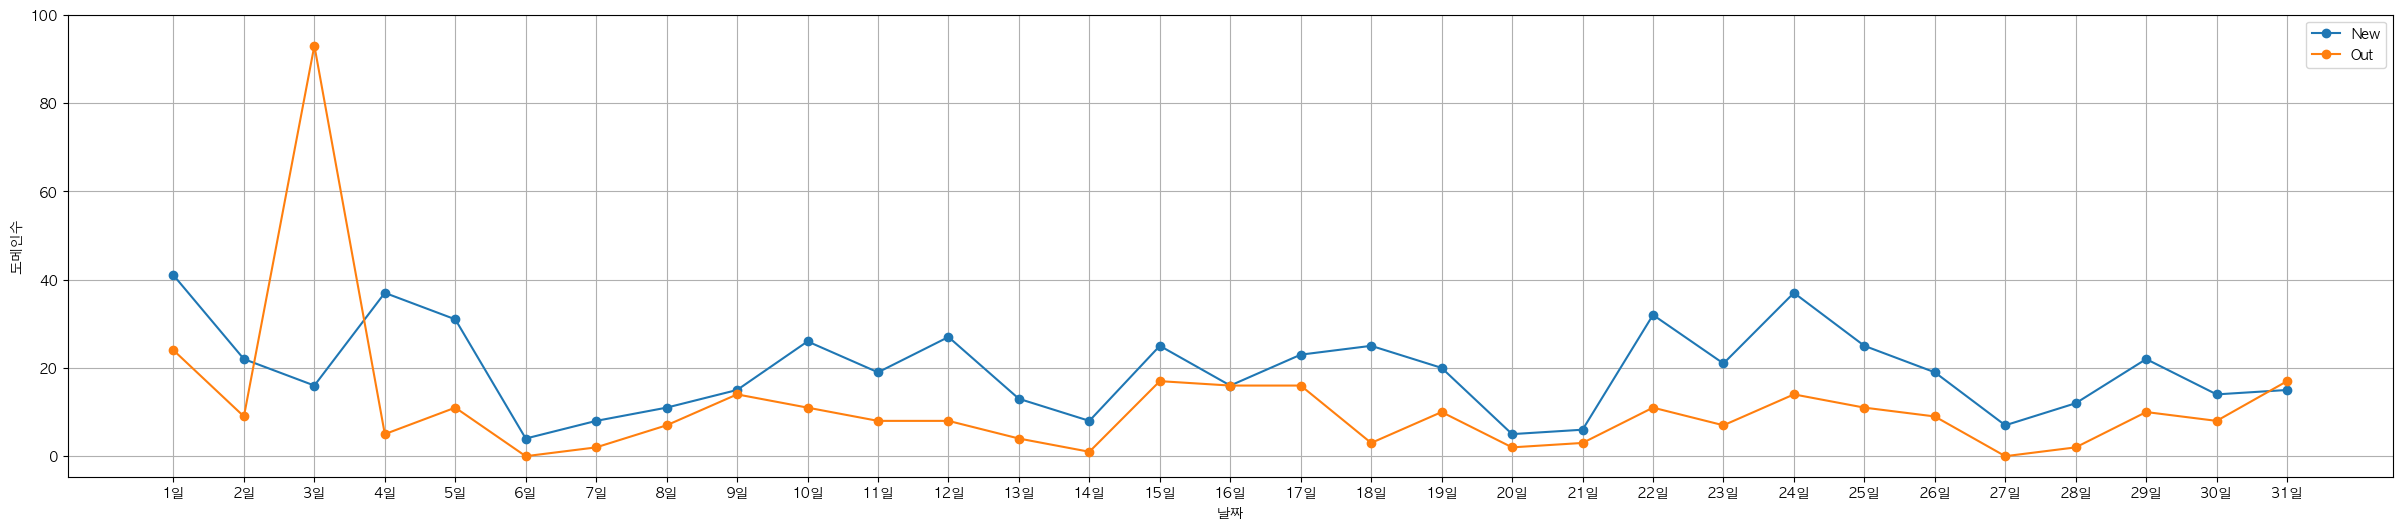

In [189]:
# x축 값 생성 (1부터 시작하여 '일' 추가)
x_labels = [f'{i+1}일' for i in range(len(new))]

# 그래프 생성
plt.figure(figsize=(30, 6))
plt.plot(new, label='New', marker='o')
plt.plot(out, label='Out', marker='o')

# x축 설정
plt.xticks(range(len(x_labels)), x_labels)
plt.yticks(range(0, 101, 20))

# 그래프 설정
plt.xlabel('날짜')
plt.ylabel('도메인수')
plt.legend()
plt.grid(True)

# 그래프 출력
plt.show()

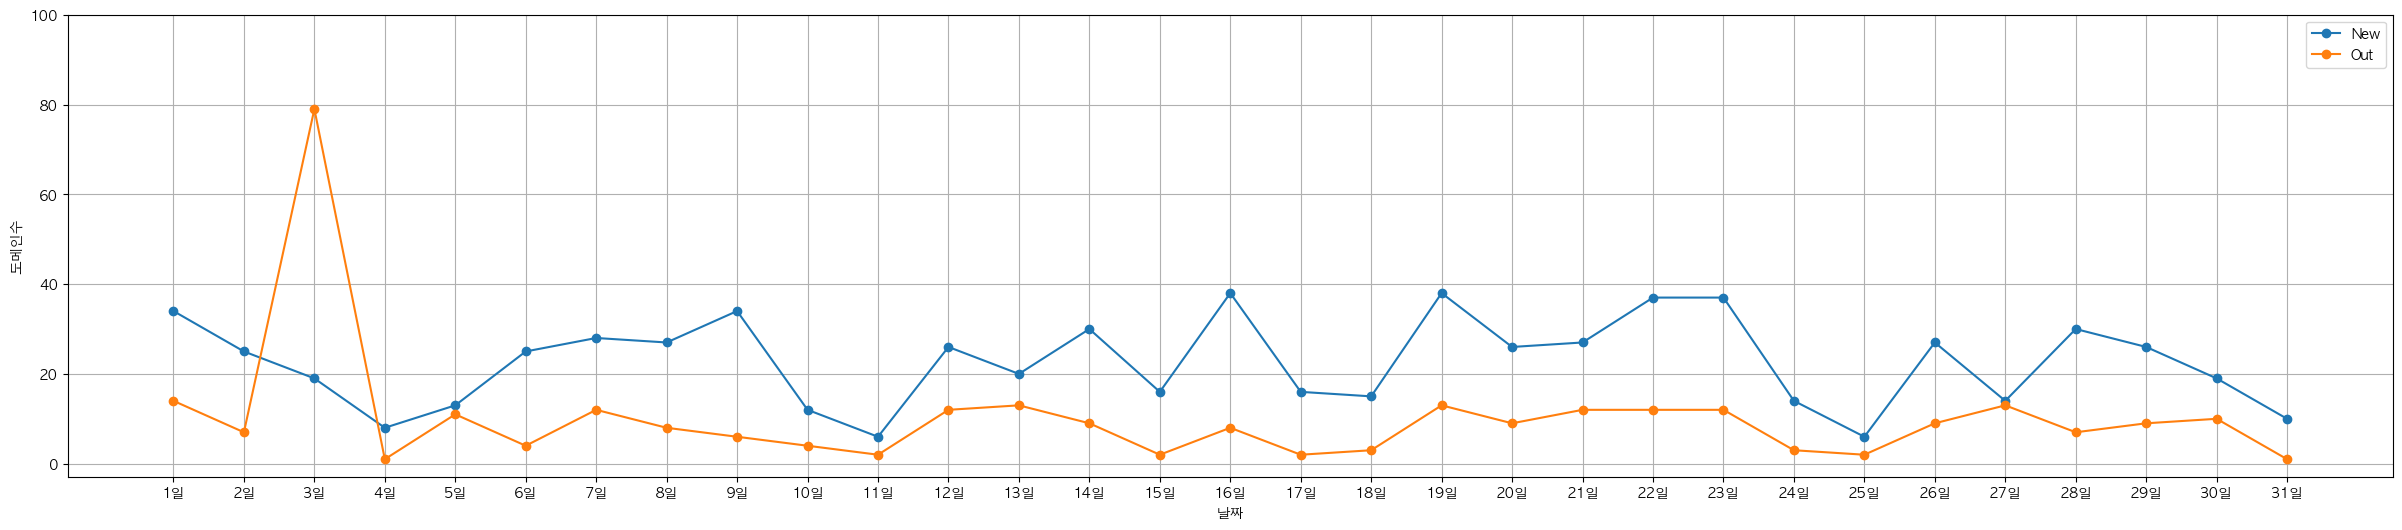

In [195]:
# x축 값 생성 (1부터 시작하여 '일' 추가)
x_labels = [f'{i+1}일' for i in range(len(new))]

# 그래프 생성
plt.figure(figsize=(30, 6))
plt.plot(new, label='New', marker='o')
plt.plot(out, label='Out', marker='o')

# x축 설정
plt.xticks(range(len(x_labels)), x_labels)
plt.yticks(range(0, 101, 20))

# 그래프 설정
plt.xlabel('날짜')
plt.ylabel('도메인수')
plt.legend()
plt.grid(True)

# 그래프 출력
plt.show()

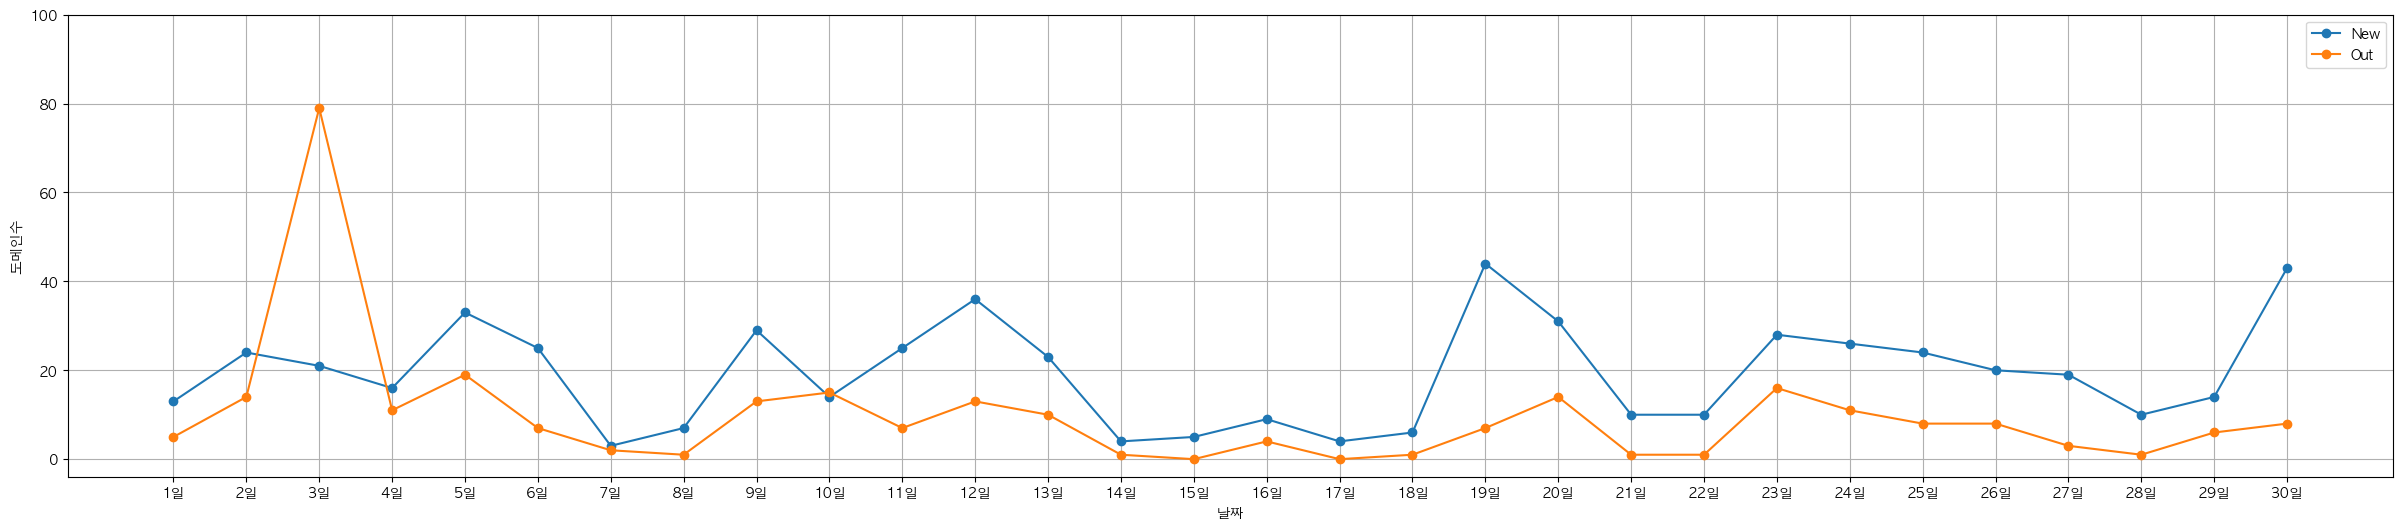

In [201]:
# x축 값 생성 (1부터 시작하여 '일' 추가)
x_labels = [f'{i+1}일' for i in range(len(new))]

# 그래프 생성
plt.figure(figsize=(30, 6))
plt.plot(new, label='New', marker='o')
plt.plot(out, label='Out', marker='o')

# x축 설정
plt.xticks(range(len(x_labels)), x_labels)
plt.yticks(range(0, 101, 20))

# 그래프 설정
plt.xlabel('날짜')
plt.ylabel('도메인수')
plt.legend()
plt.grid(True)

# 그래프 출력
plt.show()

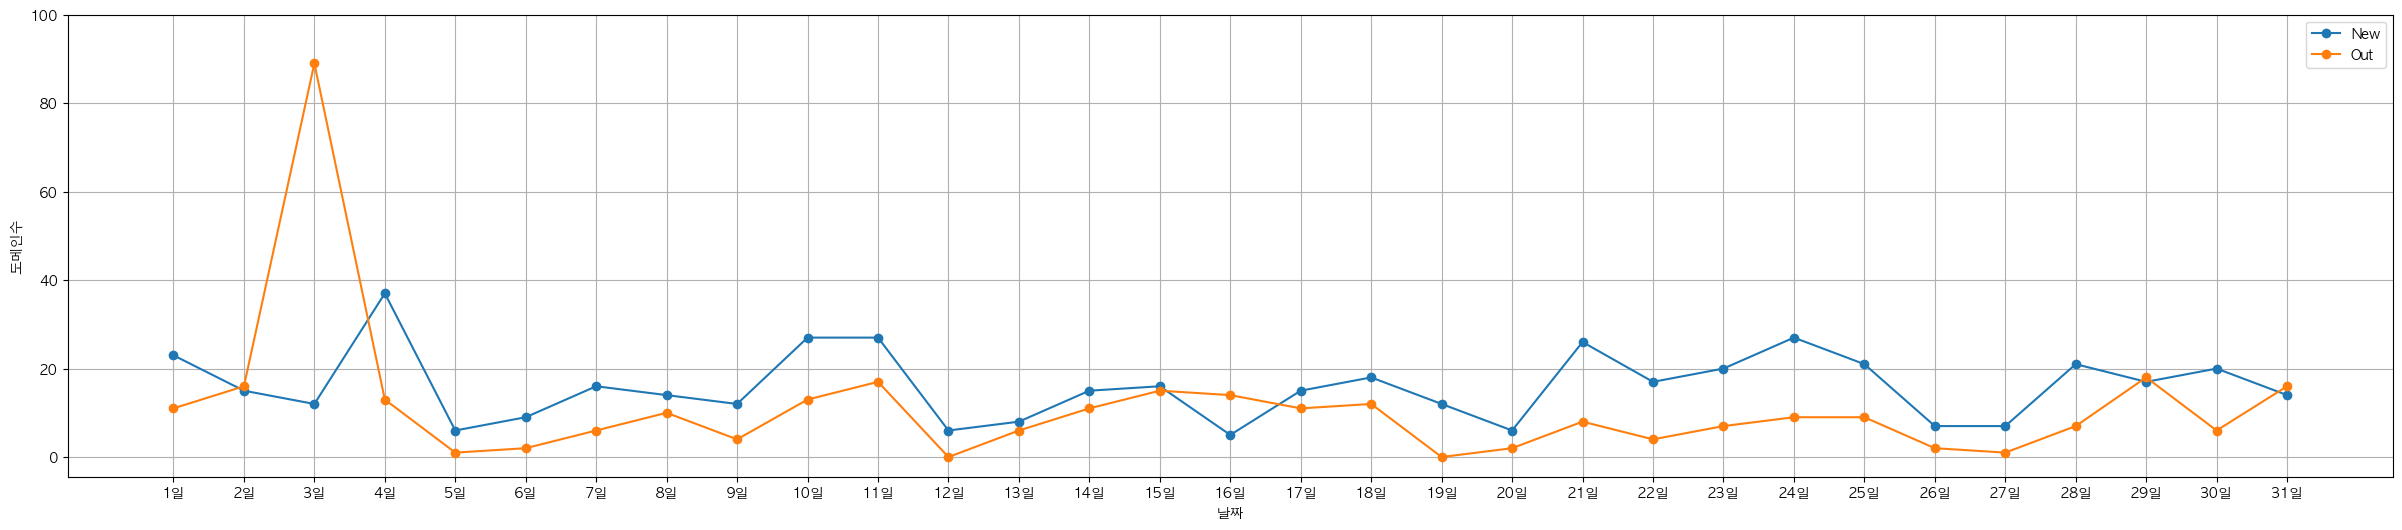

In [207]:
# x축 값 생성 (1부터 시작하여 '일' 추가)
x_labels = [f'{i+1}일' for i in range(len(new))]

# 그래프 생성
plt.figure(figsize=(30, 6))
plt.plot(new, label='New', marker='o')
plt.plot(out, label='Out', marker='o')

# x축 설정
plt.xticks(range(len(x_labels)), x_labels)
plt.yticks(range(0, 101, 20))

# 그래프 설정
plt.xlabel('날짜')
plt.ylabel('도메인수')
plt.legend()
plt.grid(True)

# 그래프 출력
plt.show()

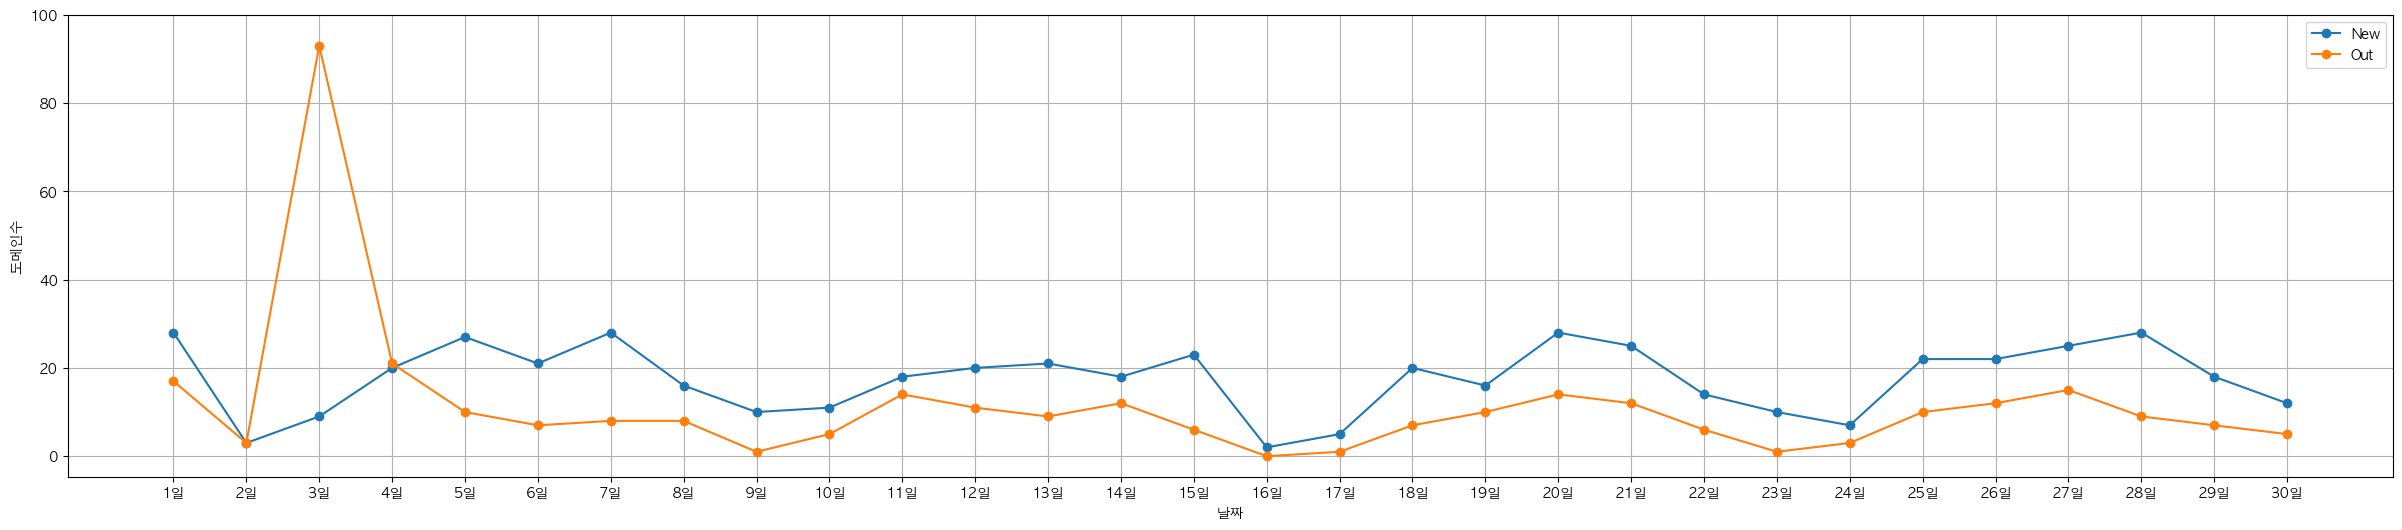

In [225]:
# x축 값 생성 (1부터 시작하여 '일' 추가)
x_labels = [f'{i+1}일' for i in range(len(new))]

# 그래프 생성
plt.figure(figsize=(30, 6))
plt.plot(new, label='New', marker='o')
plt.plot(out, label='Out', marker='o')

# x축 설정
plt.xticks(range(len(x_labels)), x_labels)
plt.yticks(range(0, 101, 20))

# 그래프 설정
plt.xlabel('날짜')
plt.ylabel('도메인수')
plt.legend()
plt.grid(True)

# 그래프 출력
plt.show()

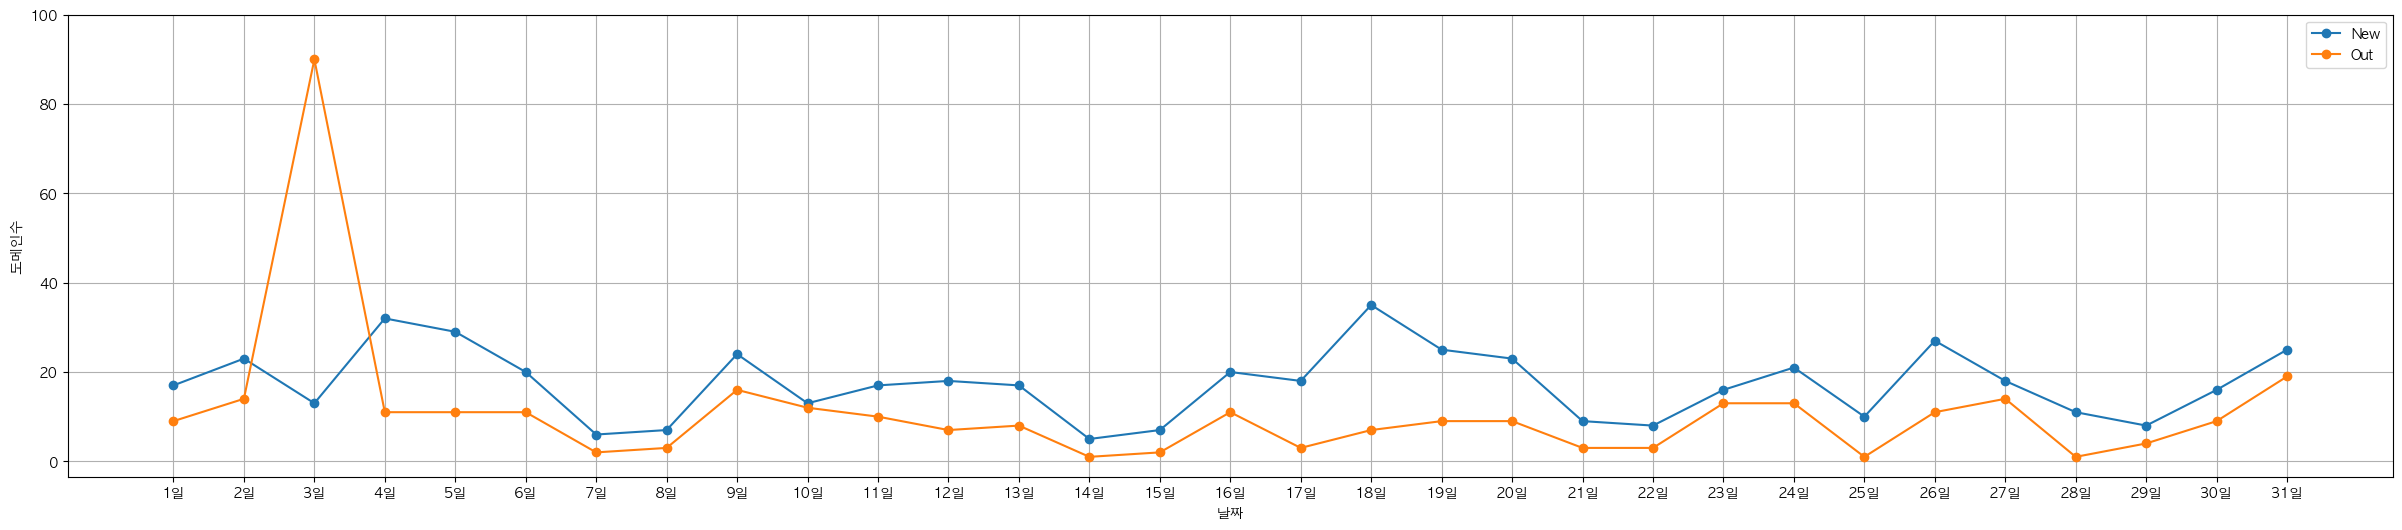

In [235]:
# x축 값 생성 (1부터 시작하여 '일' 추가)
x_labels = [f'{i+1}일' for i in range(len(new))]

# 그래프 생성
plt.figure(figsize=(30, 6))
plt.plot(new, label='New', marker='o')
plt.plot(out, label='Out', marker='o')

# x축 설정
plt.xticks(range(len(x_labels)), x_labels)
plt.yticks(range(0, 101, 20))

# 그래프 설정
plt.xlabel('날짜')
plt.ylabel('도메인수')
plt.legend()
plt.grid(True)

# 그래프 출력
plt.show()

In [291]:
place_count = []
new = []
out = []
for i in range(1,32) :
    j = 20241200 + i
    place1 = len(place[place['regist_ymd'] == j])
    place2 = len(place[place['delete_ymd'] == j])
    place3 = str(place1) + '/' + str(place2)
    new.append(place1)
    out.append(place2)
    place_count.append(place3)
place_count = pd.DataFrame(place_count).T
place_count.index = [['경영지원']]
column_names = [f'{day}일' for day in range(1, 32)]
place_count.columns = column_names

In [293]:
place_count.to_excel('/Users/user/Documents/진행중 업무/count2.xlsx')

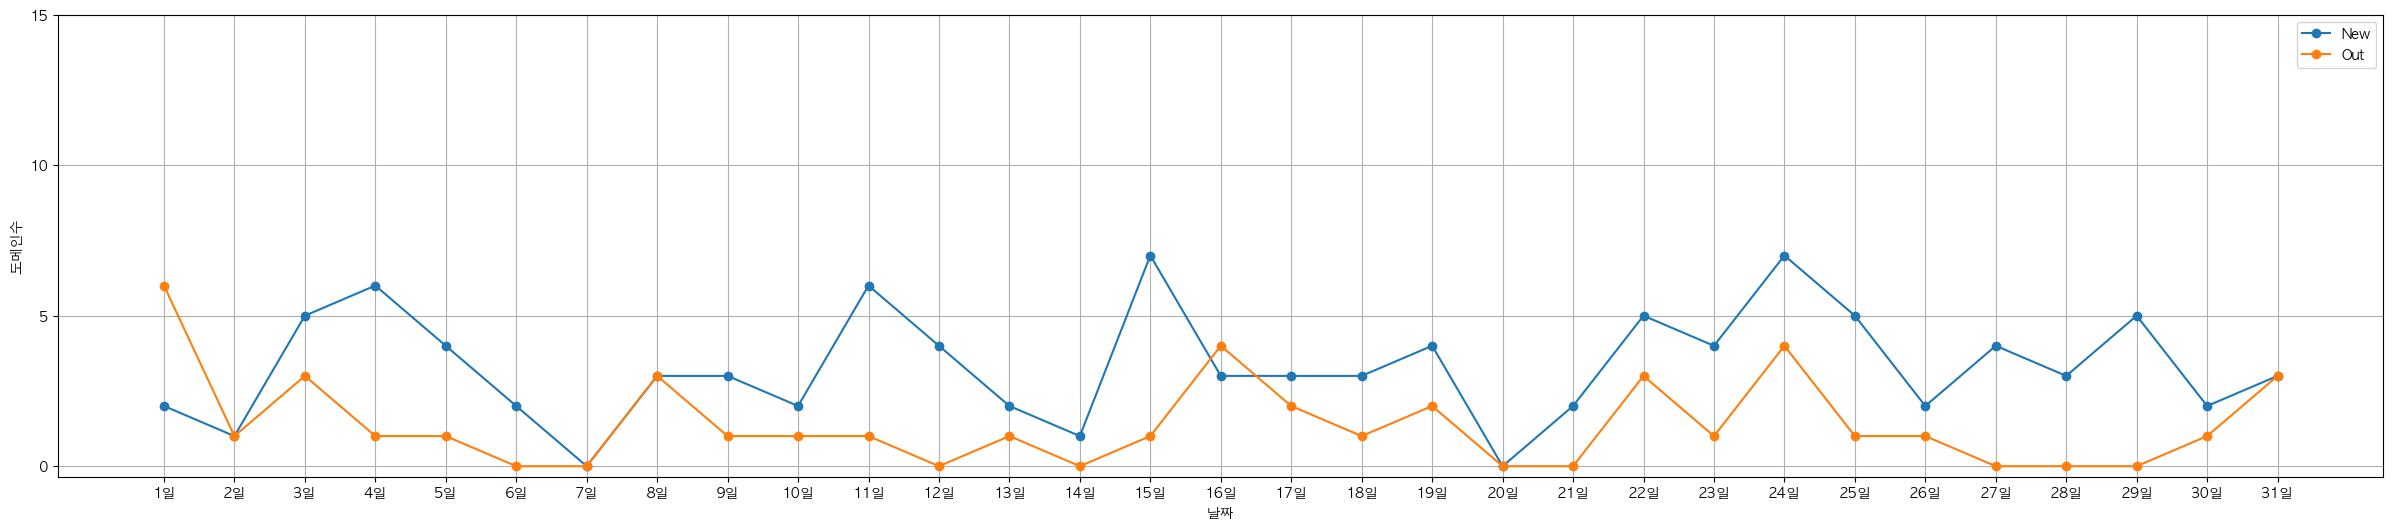

In [265]:
# x축 값 생성 (1부터 시작하여 '일' 추가)
x_labels = [f'{i+1}일' for i in range(len(new))]

# 그래프 생성
plt.figure(figsize=(30, 6))
plt.plot(new, label='New', marker='o')
plt.plot(out, label='Out', marker='o')

# x축 설정
plt.xticks(range(len(x_labels)), x_labels)
plt.yticks(range(0, 16, 5))

# 그래프 설정
plt.xlabel('날짜')
plt.ylabel('도메인수')
plt.legend()
plt.grid(True)

# 그래프 출력
plt.show()

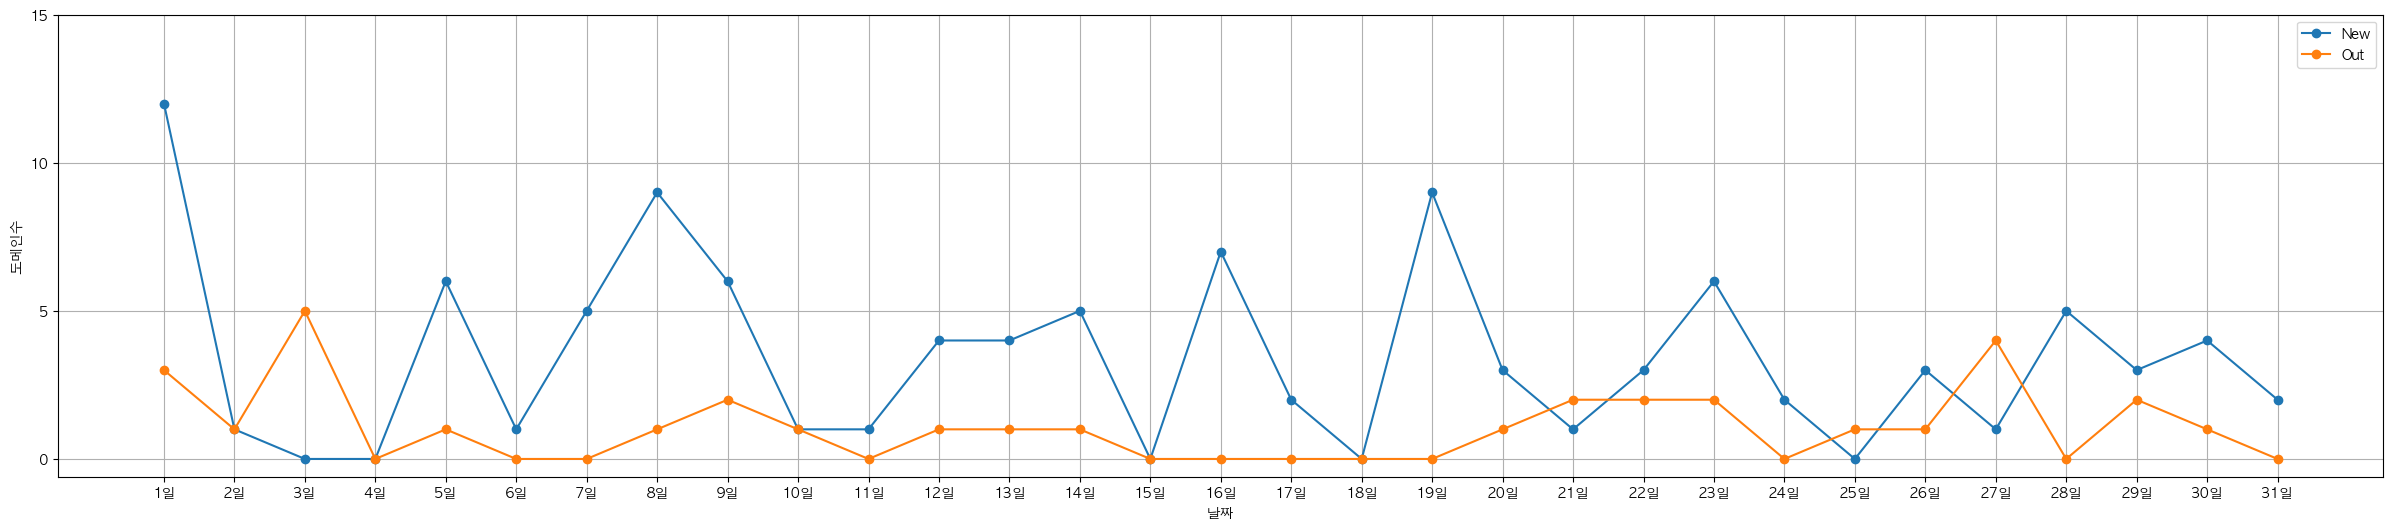

In [271]:
# x축 값 생성 (1부터 시작하여 '일' 추가)
x_labels = [f'{i+1}일' for i in range(len(new))]

# 그래프 생성
plt.figure(figsize=(30, 6))
plt.plot(new, label='New', marker='o')
plt.plot(out, label='Out', marker='o')

# x축 설정
plt.xticks(range(len(x_labels)), x_labels)
plt.yticks(range(0, 16, 5))

# 그래프 설정
plt.xlabel('날짜')
plt.ylabel('도메인수')
plt.legend()
plt.grid(True)

# 그래프 출력
plt.show()

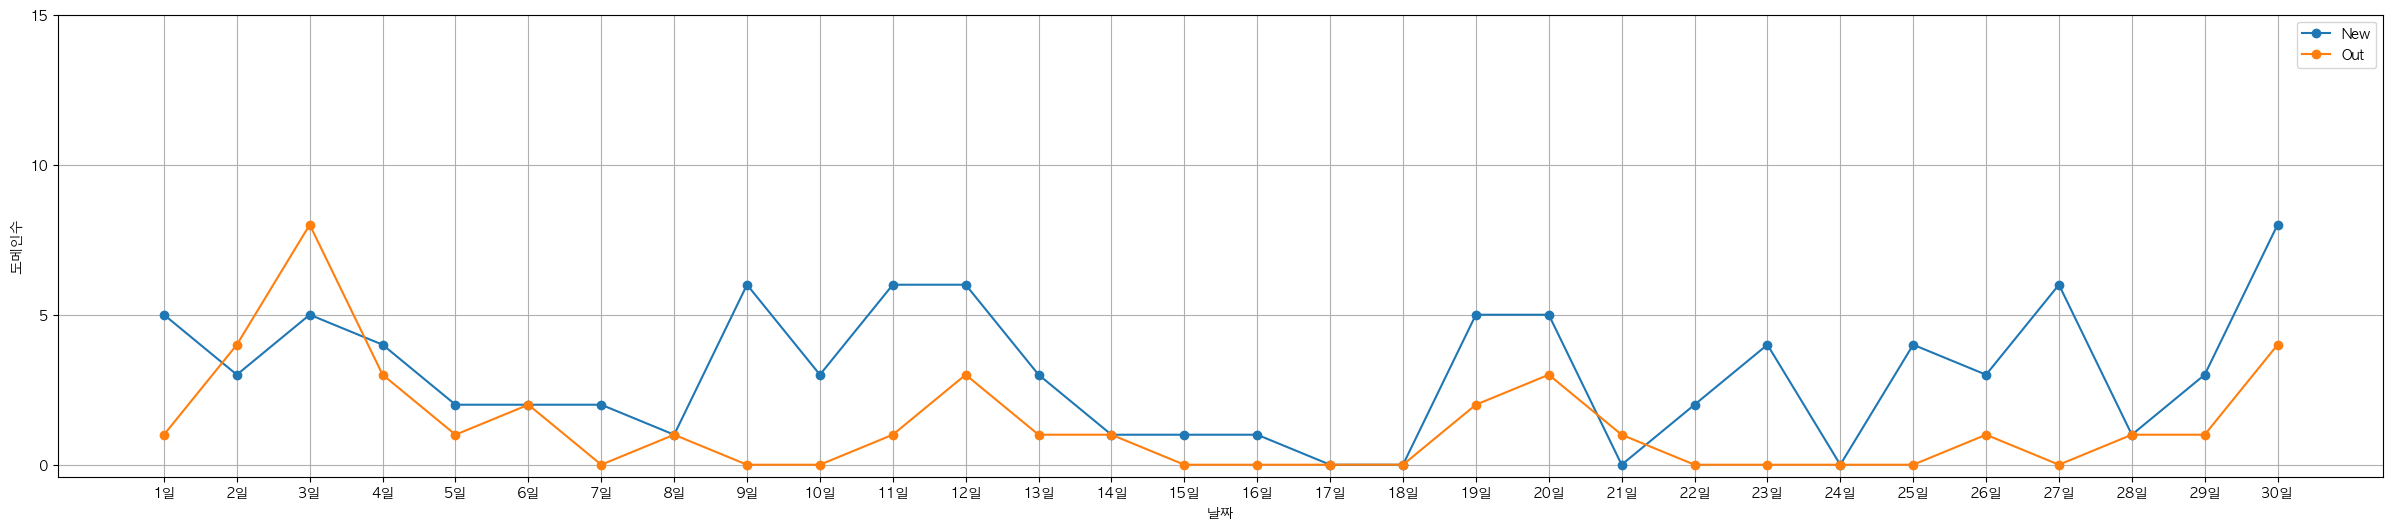

In [277]:
# x축 값 생성 (1부터 시작하여 '일' 추가)
x_labels = [f'{i+1}일' for i in range(len(new))]

# 그래프 생성
plt.figure(figsize=(30, 6))
plt.plot(new, label='New', marker='o')
plt.plot(out, label='Out', marker='o')

# x축 설정
plt.xticks(range(len(x_labels)), x_labels)
plt.yticks(range(0, 16, 5))

# 그래프 설정
plt.xlabel('날짜')
plt.ylabel('도메인수')
plt.legend()
plt.grid(True)

# 그래프 출력
plt.show()

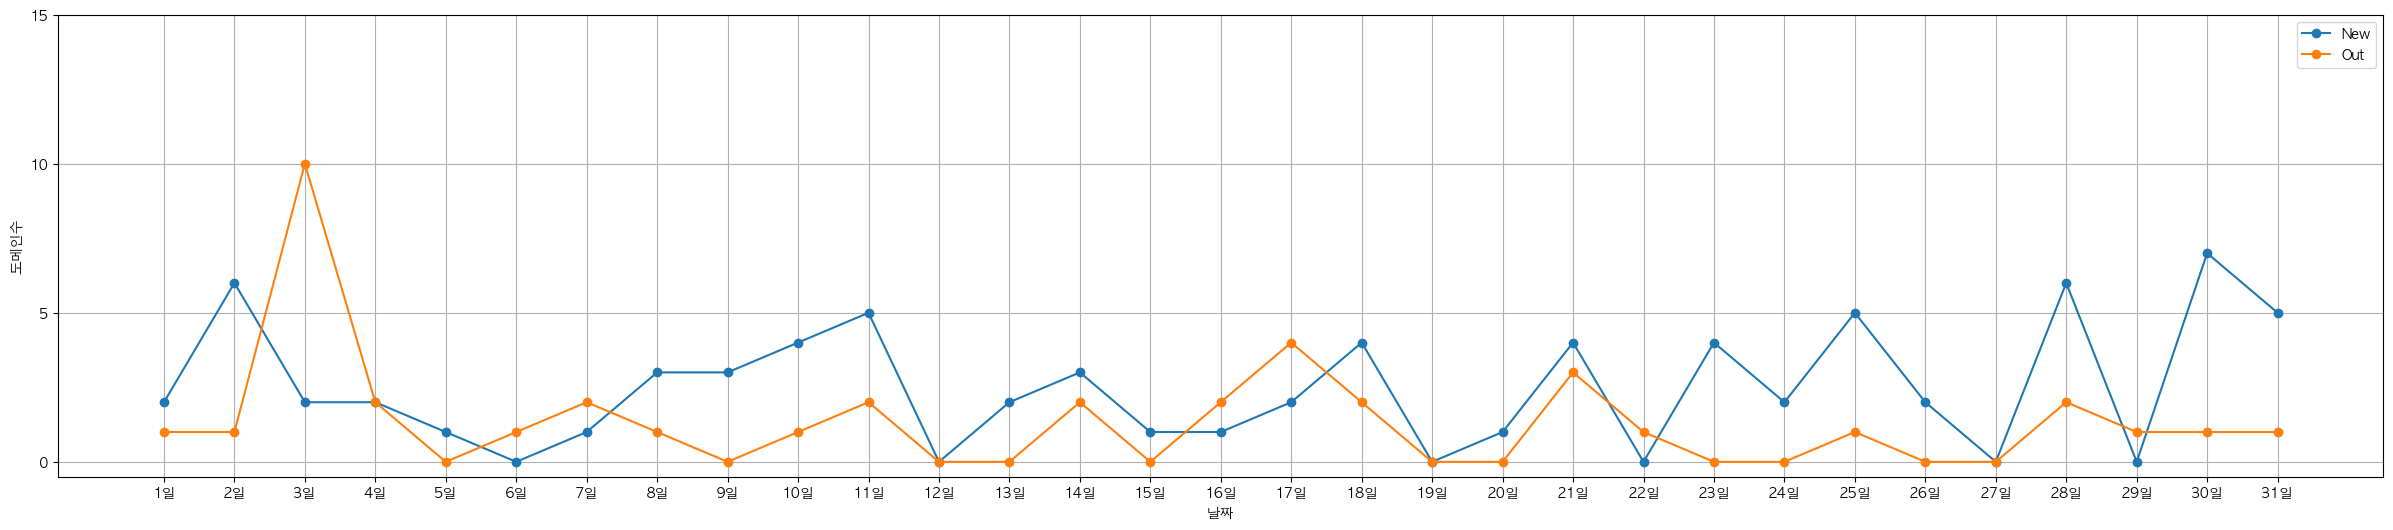

In [283]:
# x축 값 생성 (1부터 시작하여 '일' 추가)
x_labels = [f'{i+1}일' for i in range(len(new))]

# 그래프 생성
plt.figure(figsize=(30, 6))
plt.plot(new, label='New', marker='o')
plt.plot(out, label='Out', marker='o')

# x축 설정
plt.xticks(range(len(x_labels)), x_labels)
plt.yticks(range(0, 16, 5))

# 그래프 설정
plt.xlabel('날짜')
plt.ylabel('도메인수')
plt.legend()
plt.grid(True)

# 그래프 출력
plt.show()

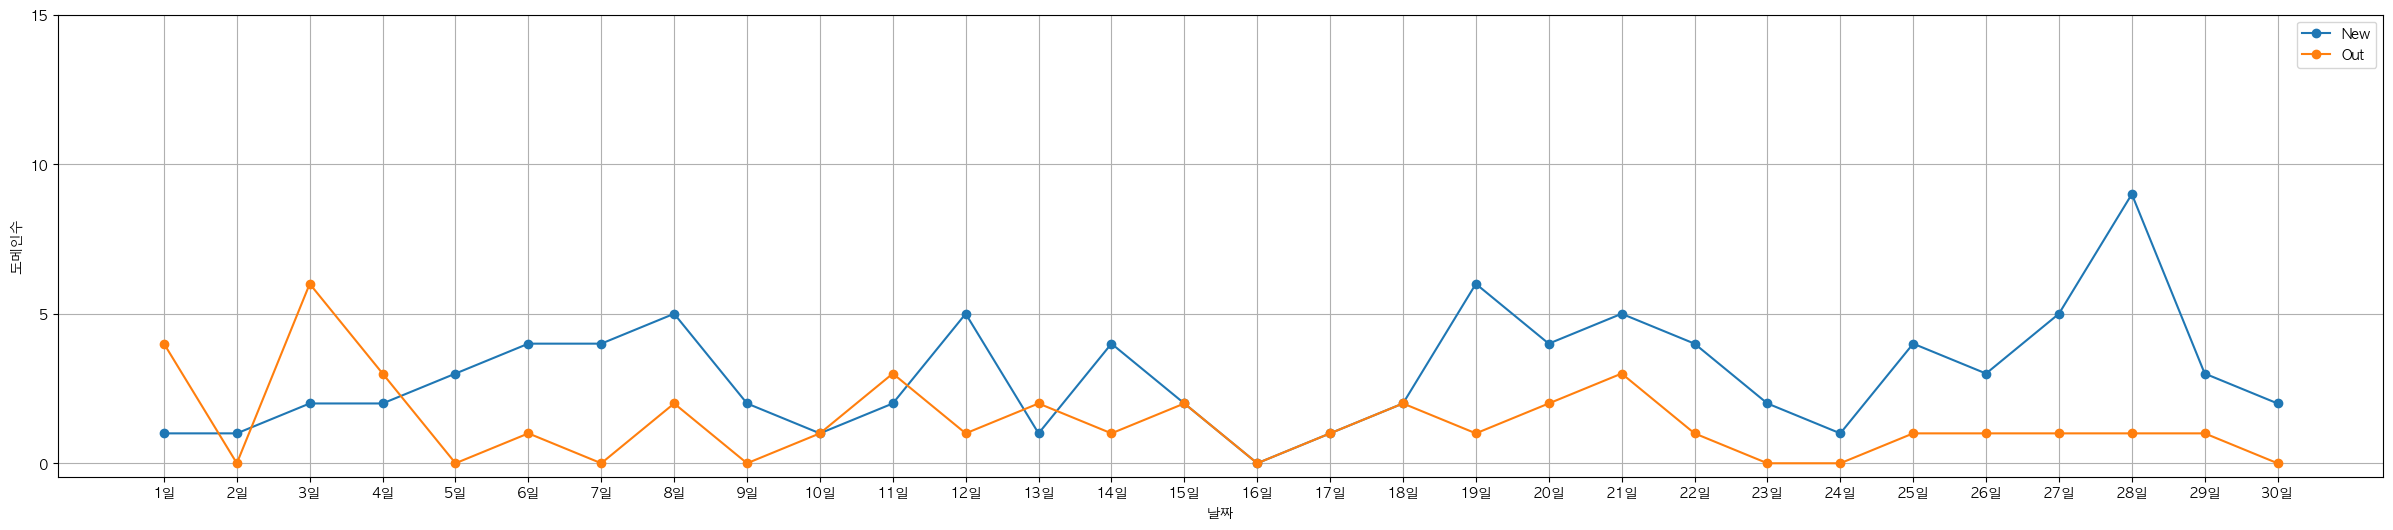

In [289]:
# x축 값 생성 (1부터 시작하여 '일' 추가)
x_labels = [f'{i+1}일' for i in range(len(new))]

# 그래프 생성
plt.figure(figsize=(30, 6))
plt.plot(new, label='New', marker='o')
plt.plot(out, label='Out', marker='o')

# x축 설정
plt.xticks(range(len(x_labels)), x_labels)
plt.yticks(range(0, 16, 5))

# 그래프 설정
plt.xlabel('날짜')
plt.ylabel('도메인수')
plt.legend()
plt.grid(True)

# 그래프 출력
plt.show()

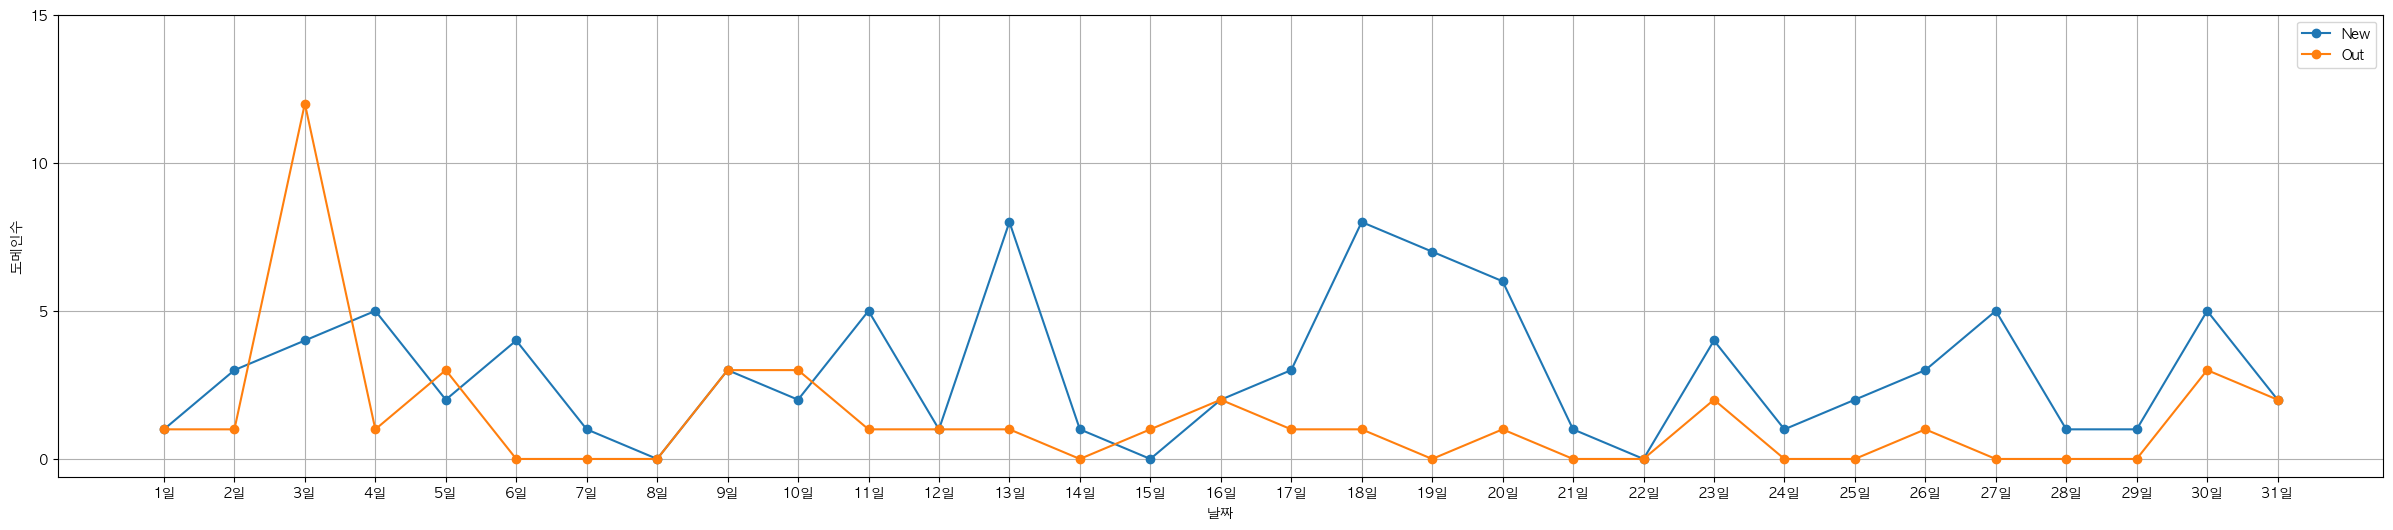